In [2]:
#Creating a client for Amazon Rekognition
import boto3
import csv
import re
import os
region='us-east-1'
with open("shar_accessKeys.csv","r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
        accesskey=line[0]
        secretkey=line[1]
photo='dataset/korf1.jpg'
client=boto3.client('rekognition',aws_access_key_id=accesskey,aws_secret_access_key=secretkey,region_name=region)
#client=boto3.client('rekognition')

In [17]:
#Brightness facor
from PIL import Image, ImageEnhance
basepath = 'C:/Users/sshar/testingbias/dataset/'
import csv
listfb=[]
faced='FaceDetails'
listmb=[]
listof=[]
y=-1
cor=-1
j=-1
genlist=[]
with open("verify.csv","r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
        gen=line[0]
        genlist.append(gen)
print(genlist)
for en in os.listdir(basepath):
    x = re.search(".*jpg", en)
    if(x):
        j=j+1
        #y=os.path.join(basepath,entry)
        z=os.path.join(basepath,en)
        im = Image.open(z)
        i=-1
        listof.append(en)
        enhancer = ImageEnhance.Brightness(im)
        dict={}
        print(genlist[j])
        numbers=[0.01,0.02,0.05,0.07,0.1,0.5,0.7,1.0,3.0,5.0,7.0,9.0,20.0,30.0]
        for x in numbers:
            l1=[]
            i=i+1
            im_output = enhancer.enhance(x)
            im_output.save('dataset/change.png')
            with open('dataset/change.png', "rb") as source_image:
                image=source_image.read()
                response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
                value=response.get(faced)
                
                if value:
                    v=value[0]
                   
                    k=v.get('Gender')
                    if k['Value']==genlist[j]:
                        l1.append('0')
                    else:

                        l1.append('1')
                
                    l1.append(k['Confidence'])
                    dict[numbers[i]]=l1
                
        if genlist[j]=='Female':
            listfb.append(dict)
        else:
            listmb.append(dict)
        listof.append(dict)

['Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male']
Male
Male
Male
Female
Female
Female
Male
Male
Male
Female
Female
Female
Male
Male
Male
Female
Female
Female
Male
Female
Female
Female
Male
Male
Male
Female
Female
Female
Male
Male
Male


In [ ]:
#listing females : fators and the corresponding identification value ( 0-correct 1-wrong) and confidence value
for one in listfb:
    print(one)

In [22]:

# if identification is wrong do 100-confidence value
from collections.abc import Mapping

name=""
for each in listfb:
    if isinstance(each, Mapping):
        flag=0
        for keyl,vall in each.items():
            if vall[0]=='1':
                vall[1]=100-vall[1]
    

In [23]:
#Updated list for females with the confidence values from 0-100
for one in listfb:
    print(one)

{0.02: ['0', 70.51692199707031], 0.05: ['0', 97.21574401855469], 0.07: ['0', 97.93964385986328], 0.1: ['0', 99.7153549194336], 0.5: ['0', 99.23445129394531], 0.7: ['0', 99.31336212158203], 1.0: ['0', 99.31173706054688], 3.0: ['0', 97.7356948852539], 5.0: ['0', 95.43597412109375], 7.0: ['0', 94.33597564697266], 9.0: ['0', 94.35319519042969]}
{0.02: ['0', 64.97480010986328], 0.05: ['0', 94.19558715820312], 0.07: ['0', 96.88496398925781], 0.1: ['0', 99.05518341064453], 0.5: ['0', 99.56611633300781], 0.7: ['0', 99.61055755615234], 1.0: ['0', 99.67023468017578], 3.0: ['0', 90.48948669433594], 5.0: ['0', 70.98439025878906], 7.0: ['0', 79.58060455322266], 9.0: ['0', 86.01748657226562]}
{0.02: ['0', 59.64750671386719], 0.05: ['0', 97.94694519042969], 0.07: ['0', 97.25288391113281], 0.1: ['0', 98.48190307617188], 0.5: ['0', 96.80535125732422], 0.7: ['0', 97.32659149169922], 1.0: ['0', 97.29955291748047], 3.0: ['0', 93.49687957763672], 5.0: ['0', 70.77242279052734], 7.0: ['0', 75.2270278930664],

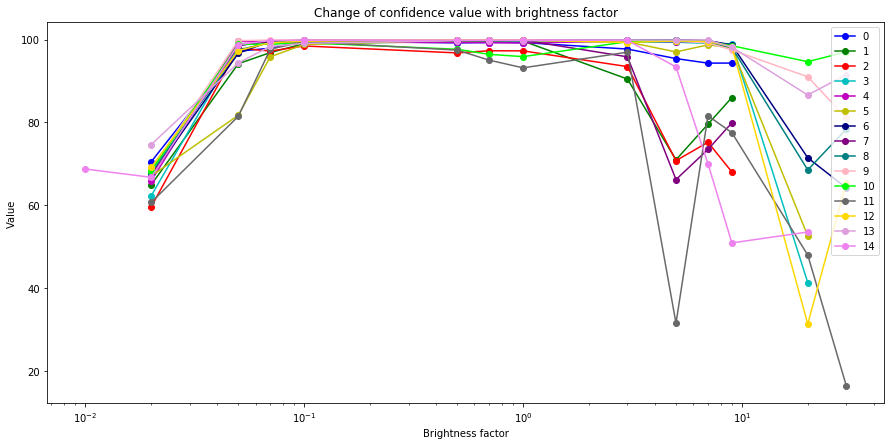

In [24]:
#Brightness variation for females
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
#color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
color=['b','g','r','c','m','y','navy','purple','teal','lightpink','lime','dimgray','gold','plum','violet','aqua']
i=-1
temp=0
val=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Brightness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with brightness factor")
for d in listfb:
    
    if isinstance(d, Mapping):
        
        l1=[]
        l2=[]
        for x,y in d.items():
            l1.append(x)
            l2.append(y[1])

        i=i+1
        plt.plot(l1,l2,color =color[i],marker='o',label=i)
        
       
plt.legend(loc="upper right")   
plt.xscale("log")
plt.show()

In [25]:
#confidence value from 0-100
# if identification is wrong do 100-confidence value
from collections.abc import Mapping

name=""
for each in listmb:
    if isinstance(each, Mapping):
        flag=0
        for keyl,vall in each.items():
            if vall[0]=='1':
                vall[1]=100-vall[1]
    

In [26]:
#listing males: fators and the corresponding identification value ( 0-correct 1-wrong) and confidence value
for one in listmb:
    print(one)

{0.05: ['1', 8.023399353027344], 0.07: ['1', 5.786033630371094], 0.1: ['1', 12.057357788085938], 0.5: ['1', 7.8515472412109375, '1', 93.8592758178711], 0.7: ['1', 4.409187316894531], 1.0: ['1', 6.811286926269531, '1', 95.48723602294922], 3.0: ['1', 13.020156860351562], 5.0: ['1', 29.760040283203125], 7.0: ['1', 41.32469177246094], 9.0: ['1', 46.80805206298828]}
{0.02: ['1', 29.247909545898438], 0.05: ['1', 22.6993408203125], 0.07: ['0', 87.21846008300781], 0.1: ['0', 90.1729507446289], 0.5: ['0', 67.6649169921875], 0.7: ['1', 42.218048095703125], 1.0: ['1', 20.98992156982422], 3.0: ['1', 49.73005676269531], 7.0: ['0', 71.40354919433594]}
{0.05: ['1', 28.165573120117188], 0.07: ['1', 21.274330139160156], 0.1: ['1', 16.55548858642578], 0.5: ['1', 5.763542175292969], 0.7: ['1', 6.852424621582031], 1.0: ['1', 11.054763793945312], 3.0: ['0', 85.27903747558594], 5.0: ['0', 92.73217010498047], 7.0: ['0', 89.73543548583984], 9.0: ['0', 92.04299926757812]}
{0.02: ['1', 32.21638488769531], 0.05:

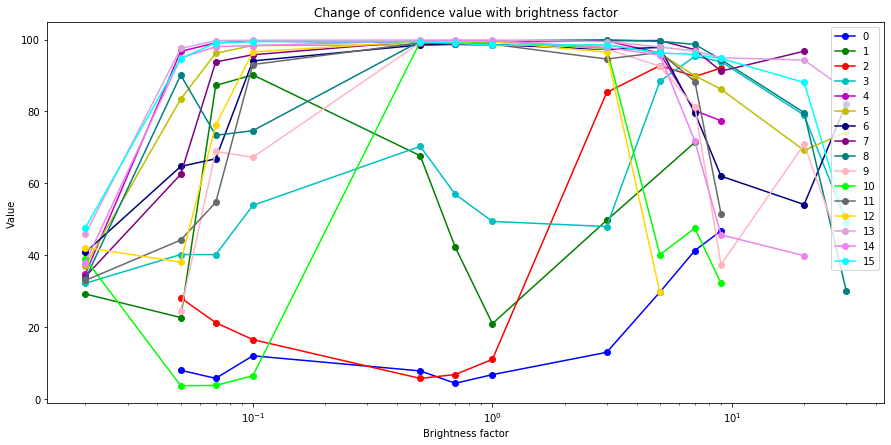

In [27]:
#plot for males with the confidence values
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
#color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
color=['b','g','r','c','m','y','navy','purple','teal','lightpink','lime','dimgray','gold','plum','violet','aqua']
i=-1
temp=0
val=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Brightness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with brightness factor")
for d in listmb:
    
    if isinstance(d, Mapping):
        
        l1=[]
        l2=[]
        for x,y in d.items():
            l1.append(x)
            l2.append(y[1])

        i=i+1
        plt.plot(l1,l2,color =color[i],marker='o',label=i)
        
       
plt.legend(loc="upper right")   
plt.xscale("log")
plt.show()

In [27]:
#Splitting the data into 3 categories
#first is images always idetified right
#second is images always identified wrong
#third is images which are predicted differently as the brightness factor changes
from collections.abc import Mapping
l3=[]
flag=0
category1=[]
category2=[]
category3=[]
name=""
for each in listof:
    if isinstance(each, Mapping):
        flag=0
        for keyl,vall in each.items():
            for v in vall:
                if v=='1':
                    if flag==0:
                        flag=2
                    if flag==2:
                        flag=2;
                    else:
                        flag=3
                if v=='0':
                    if flag==0:
                        flag=1
                    if flag==1:
                        flag=1
                    else:
                        flag=3

        if flag==1:
            category1.append(name)
            category1.append(each)
        if flag==2:
            category2.append(name)
            category2.append(each)
        if flag==3:
            category3.append(name)
            category3.append(each)
    else:
        name=each
print("\nCategory1:")    
print(category1)
print("\nCategory2:")    
print(category2)
print("\nCategory3:")    
print(category3)



Category1:
['kenyafemale.jpg', {0.02: ['0', 66.9731674194336], 0.05: ['0', 99.36978149414062], 0.07: ['0', 99.87869262695312], 0.1: ['0', 99.94896697998047], 0.5: ['0', 99.9831771850586], 0.7: ['0', 99.98881530761719], 1.0: ['0', 99.98619842529297], 3.0: ['0', 99.92159271240234], 5.0: ['0', 97.07982635498047], 7.0: ['0', 97.77600860595703]}, 'koreanf.jpg', {0.01: ['0', 70.56883239746094], 0.02: ['0', 66.88712310791016], 0.05: ['0', 98.70088195800781], 0.07: ['0', 99.20216369628906], 0.1: ['0', 96.72906494140625], 0.5: ['0', 96.51296997070312], 0.7: ['0', 97.32557678222656], 1.0: ['0', 97.33777618408203], 3.0: ['0', 99.32838439941406], 5.0: ['0', 98.99453735351562], 7.0: ['0', 97.69542694091797], 9.0: ['0', 96.84285736083984], 20.0: ['0', 92.14749908447266], 30.0: ['0', 77.3870849609375]}, 'pv.jpg', {0.02: ['0', 64.82209777832031], 0.05: ['0', 87.32269287109375], 0.07: ['0', 98.29808807373047], 0.1: ['0', 92.26351928710938], 0.5: ['0', 97.4356689453125], 0.7: ['0', 96.760009765625], 1.

In [261]:
#Category 1
from collections.abc import Mapping
cat1dict={}
list1=[]
ll1=[]
for cat1 in category1:
    if isinstance(cat1, Mapping):
        cat1dict={}
        for keycat1,valcat1 in cat1.items():
            for vals in valcat1:
                if vals=='0':
                    ll1.append(vals)
                if vals=='1':
                    ll1.append(vals)
                else:
                    cat1dict[keycat1]=vals
        list1.append(cat1dict)
print(list1)

[{0.02: 66.9731674194336, 0.05: 99.36978149414062, 0.07: 99.87869262695312, 0.1: 99.94896697998047, 0.5: 99.9831771850586, 0.7: 99.98881530761719, 1.0: 99.98619842529297, 3.0: 99.92159271240234, 5.0: 97.07982635498047, 7.0: 97.77600860595703}, {0.01: 70.56883239746094, 0.02: 66.88712310791016, 0.05: 98.70088195800781, 0.07: 99.20216369628906, 0.1: 96.72906494140625, 0.5: 96.51296997070312, 0.7: 97.32557678222656, 1.0: 97.33777618408203, 3.0: 99.32838439941406, 5.0: 98.99453735351562, 7.0: 97.69542694091797, 9.0: 96.84285736083984, 20.0: 92.14749908447266, 30.0: 77.3870849609375}, {0.02: 64.82209777832031, 0.05: 87.32269287109375, 0.07: 98.29808807373047, 0.1: 92.26351928710938, 0.5: 97.4356689453125, 0.7: 96.760009765625, 1.0: 96.30369567871094, 3.0: 71.29768371582031, 5.0: 81.47154235839844}]


In [263]:
#Category 2
cat2dict={}
list2=[]
ll1=[]
for cat2 in category2:
    if isinstance(cat2, Mapping):
        cat2dict={}
        for keycat2,valcat2 in cat2.items():
            for vals in valcat2:
                if vals=='0':
                    ll1.append(vals)
                if vals=='1':
                    ll1.append(vals)
                else:
                    cat2dict[keycat2]=vals
        list2.append(cat2dict)
print(list2)

[{0.05: 91.97660064697266, 0.07: 97.23590850830078, 0.1: 87.94264221191406, 0.5: 93.8592758178711, 0.7: 92.11467742919922, 1.0: 95.48723602294922, 3.0: 86.97984313964844, 5.0: 70.23995971679688, 7.0: 58.67530822753906, 9.0: 53.19194793701172}]


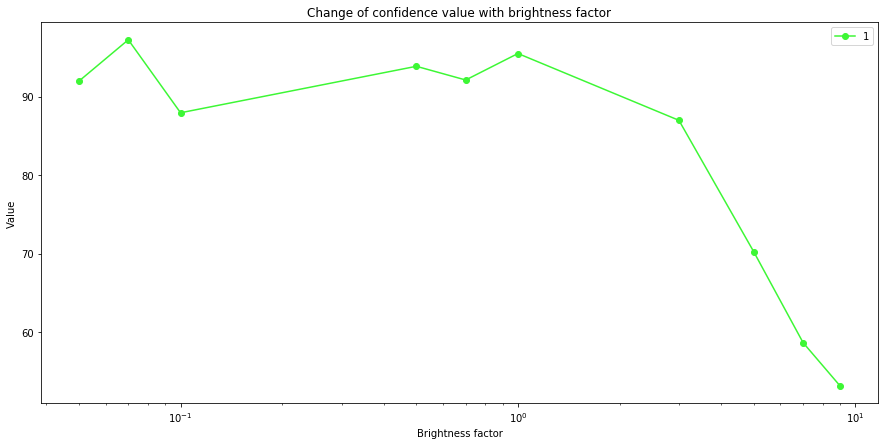

In [264]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
i=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Brightness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with brightness factor")
for d in list2:
    i=i+1
    l1=[]
    l2=[]
    for x,y in d.items():
        l1.append(x)
        l2.append(y)
    plt.plot(l1, l2, color =color[i],marker='o',label=i)
plt.legend(loc="upper right")    
plt.xscale("log")
plt.show()

In [265]:
#Category 3
cat3dict={}
list3=[]
ll1=[]
for cat3 in category3:
    if isinstance(cat3, Mapping):
        list3.append(cat3)
print(list3)

[{0.02: ['0', 75.3424301147461], 0.05: ['0', 99.38933563232422], 0.07: ['0', 99.66726684570312], 0.1: ['0', 99.84510040283203], 0.5: ['0', 99.96531677246094], 0.7: ['0', 99.97644805908203], 1.0: ['0', 99.97807312011719], 3.0: ['0', 99.50231170654297], 5.0: ['0', 93.36849212646484], 7.0: ['0', 89.5778579711914], 9.0: ['0', 63.097774505615234], 20.0: ['1', 66.01045227050781], 30.0: ['1', 53.50140380859375]}, {0.02: ['1', 70.75209045410156], 0.05: ['1', 77.3006591796875], 0.07: ['0', 87.21846008300781], 0.1: ['0', 90.1729507446289], 0.5: ['0', 67.6649169921875], 0.7: ['1', 57.781951904296875], 1.0: ['1', 79.01007843017578], 3.0: ['1', 50.26994323730469], 7.0: ['0', 71.40354919433594]}, {0.05: ['1', 71.83442687988281], 0.07: ['1', 78.72566986083984], 0.1: ['1', 83.44451141357422], 0.5: ['1', 94.23645782470703], 0.7: ['1', 93.14757537841797], 1.0: ['1', 88.94523620605469], 3.0: ['0', 85.27903747558594], 5.0: ['0', 92.73217010498047], 7.0: ['0', 89.73543548583984], 9.0: ['0', 92.042999267578

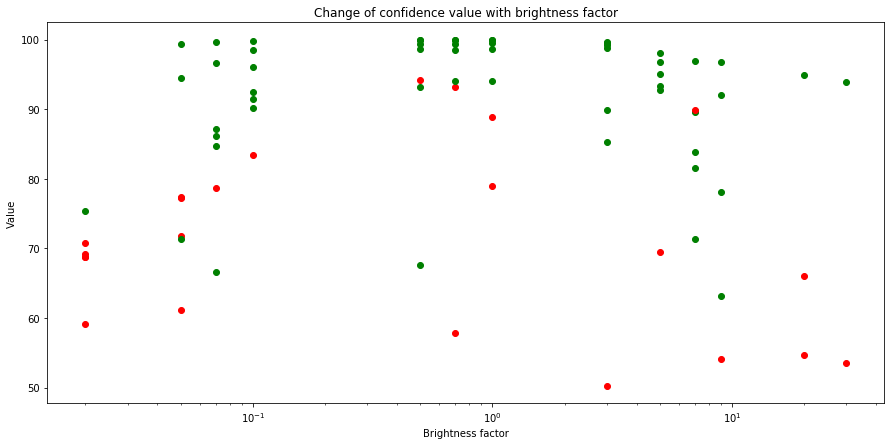

In [266]:
#Plotting the right and wrong predictions
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']

fig = plt.figure(figsize = (15, 7))
plt.xlabel("Brightness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with brightness factor")
for d in list3:
    
    for x,y in d.items():
        if y[0]=='0':
            plt.plot(x,y[1],color ='green',marker='o')
            
            
        else: 
            plt.plot(x,y[1],color ='r',marker='o')
  
    
       
#plt.legend(loc="upper right")   
plt.xscale("log")
plt.show()

In [4]:
#Sharpness
from PIL import Image, ImageEnhance
basepath = 'C:/Users/sshar/testingbias/dataset/'
import csv
listof2=[]
listfs=[]
listms=[]
j=-1
cor=-1
genlist=[]
with open("verify.csv","r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
        gen=line[0]
        genlist.append(gen)
print(genlist)
for en in os.listdir(basepath):
    x = re.search(".*jpg", en)
    if(x):
        #y=os.path.join(basepath,entry)
        z=os.path.join(basepath,en)
        im = Image.open(z)
        listof2.append(en)
        i=-1
        j=j+1
        print(genlist[j])
        enhancer = ImageEnhance.Sharpness(im)
        dict={}
        numbers=[0.05,0.1,0.5,1.0,5.0,9.0,20.0,30.0,40,60,80,100,200,300]
        for x in numbers:
            l1=[]
            i=i+1
            im_output = enhancer.enhance(x)
            im_output.save('dataset/change.png')
            with open('dataset/change.png', "rb") as source_image:
                image=source_image.read()
                response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
                value=response.get('FaceDetails')
                
                if value:
                    v=value[0]
                   
                    k=v.get('Gender')
                    if k['Value']==genlist[j]:
                        l1.append('0')
                    else:

                        l1.append('1')
                
                    l1.append(k['Confidence'])
                    dict[numbers[i]]=l1
                
                 
        if genlist[j]=='Female':
            listfs.append(en)
            listfs.append(dict)
        else:
            listms.append(en)
            listms.append(dict)                                        
        listof2.append(dict)

['Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male']
Male
Male
Male
Female
Female
Female
Male
Male
Male
Female
Female
Female
Male
Male
Male
Female
Female
Female
Male
Female
Female
Female
Male
Male
Male
Female
Female
Female
Male
Male
Male


In [ ]:
#listing females : fators and the corresponding identification value ( 0-correct 1-wrong) and confidence value
#If identification is wrong, do 100-confidence value
from collections.abc import Mapping

name=""
for each in listfs:
    if isinstance(each, Mapping):
        flag=0
        for keyl,vall in each.items():
            if vall[0]=='1':
                vall[1]=100-vall[1]

In [ ]:
#Updated list for females with the confidence values from 0-100
for each in listfs:
    print(each)

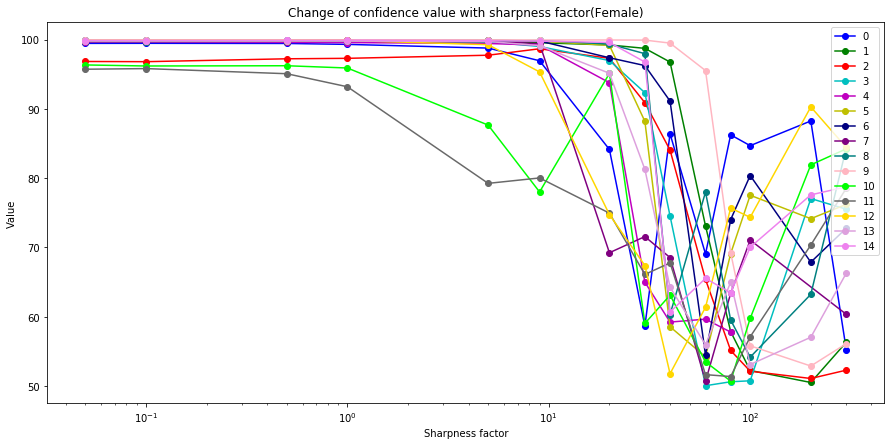

In [6]:
#Plot for confidence values with the sharpness factors for females
from collections.abc import Mapping
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
#color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
color=['b','g','r','c','m','y','navy','purple','teal','lightpink','lime','dimgray','gold','plum','violet','aqua']
i=-1
temp=0
val=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Sharpness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with sharpness factor(Female)")
for d in listfs:
    
    if isinstance(d, Mapping):
        
        l1=[]
        l2=[]
        for x,y in d.items():
            l1.append(x)
            l2.append(y[1])

        i=i+1
        plt.plot(l1,l2,color =color[i],marker='o',label=i)
        
       
plt.legend(loc="upper right")   
plt.xscale("log")
plt.show()

In [7]:
#listing males : fators and the corresponding identification value ( 0-correct 1-wrong) and confidence value
#If identification is wrong, do 100-confidence value
from collections.abc import Mapping

name=""
for each in listms:
    if isinstance(each, Mapping):
        flag=0
        for keyl,vall in each.items():
            if vall[0]=='1':
                vall[1]=100-vall[1]

In [ ]:
#Updated list for males with the confidence values from 0-100
for each in listms:
    print(each)

In [ ]:
#Plot for confidence values with the sharpness factors for males
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
#color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
color=['b','g','r','c','m','y','navy','purple','teal','lightpink','lime','dimgray','gold','plum','violet','aqua']
i=-1
temp=0
val=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Brightness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with sharpness factor")
for d in listms:
    
    if isinstance(d, Mapping):
        
        l1=[]
        l2=[]
        for x,y in d.items():
            l1.append(x)
            l2.append(y[1])

        i=i+1
        plt.plot(l1,l2,color =color[i],marker='o',label=i)
        
       
plt.legend(loc="upper right")   
plt.xscale("log")
plt.show()

In [5]:
from PIL import Image, ImageEnhance
basepath = 'C:/Users/sshar/testingbias/dataset/'
import csv
listof3=[]
listmc=[]
listfc=[]
y=-1
cor=-1
j=-1
genlist=[]
with open("verify.csv","r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
        gen=line[0]
        genlist.append(gen)

for en in os.listdir(basepath):
    x = re.search(".*jpg", en)
    if(x):
        #y=os.path.join(basepath,entry)
        z=os.path.join(basepath,en)
        im = Image.open(z)
        listof3.append(en)
        j=j+1
        print(genlist[j])
        i=-1
        enhancer = ImageEnhance.Contrast(im)
        dict={}
        numbers=[0.5,1.0,1.5,2.0,4.0,8.0,10,20,40,60,80,100,200,300]
        for x in numbers:
            l1=[]
            i=i+1
            im_output = enhancer.enhance(x)
            im_output.save('dataset/change2.png')
            with open('dataset/change2.png', "rb") as source_image:
                image=source_image.read()
                response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
              
                value=response.get("FaceDetails")
                
                if value:
                    v=value[0]
                   
                    k=v.get('Gender')
                    if k['Value']==genlist[j]:
                        l1.append('0')
                    else:

                        l1.append('1')
                
                    l1.append(k['Confidence'])
                    dict[numbers[i]]=l1
                
        if genlist[j]=='Female':
            listfc.append(en)
            listfc.append(dict)
        else:
            listmc.append(en)
            listmc.append(dict)                                        
                                                
        listof3.append(dict)


Male
Male
Male
Female
Female
Female
Male
Male
Male
Female
Female
Female
Male
Male
Male
Female
Female
Female
Male
Female
Female
Female
Male
Male
Male
Female
Female
Female
Male
Male
Male


In [6]:
for each in listof3:
    print(each)

adience1.jpg
{0.5: ['1', 94.40454864501953], 1.0: ['1', 93.18871307373047], 1.5: ['1', 96.7161865234375], 2.0: ['1', 95.54528045654297], 4.0: ['1', 86.07300567626953], 8.0: ['1', 64.19695281982422], 10: ['1', 69.60930633544922], 20: ['1', 73.39228057861328], 40: ['1', 80.45819091796875], 60: ['1', 91.96125030517578], 80: ['1', 91.22441101074219], 100: ['1', 90.62784576416016], 200: ['1', 91.00985717773438], 300: ['1', 91.00985717773438]}
boy1.jpg
{0.5: ['0', 98.07539367675781], 1.0: ['1', 79.01007843017578], 1.5: ['1', 97.86468505859375], 2.0: ['1', 99.60386657714844], 4.0: ['1', 99.13301849365234], 8.0: ['1', 93.84419250488281], 10: ['1', 89.64946746826172], 20: ['1', 67.16148376464844], 40: ['1', 60.120140075683594], 60: ['1', 52.319175720214844], 80: ['0', 63.59135055541992], 100: ['1', 54.3690185546875], 200: ['0', 55.73543167114258], 300: ['0', 55.73543167114258]}
boy2b1.0.jpg
{0.5: ['1', 91.9534912109375], 1.0: ['1', 88.94523620605469], 1.5: ['1', 82.91163635253906], 2.0: ['1', 9

In [7]:
for each in listfc:
    print(each)

chf1.jpg
{0.5: ['0', 99.1020736694336], 1.0: ['0', 99.31173706054688], 1.5: ['0', 99.47735595703125], 2.0: ['0', 99.61813354492188], 4.0: ['0', 99.18354797363281], 8.0: ['0', 93.10892486572266], 10: ['0', 88.47833251953125], 20: ['0', 88.9595947265625], 40: ['0', 82.59712219238281], 60: ['0', 81.38851165771484], 80: ['0', 80.63005065917969], 100: ['0', 81.99069213867188], 200: ['0', 80.65692901611328], 300: ['0', 80.65692901611328]}
chf2.jpg
{0.5: ['0', 99.5003433227539], 1.0: ['0', 99.67023468017578], 1.5: ['0', 99.57988739013672], 2.0: ['0', 99.7038345336914], 4.0: ['0', 99.8821029663086], 8.0: ['0', 99.8143081665039], 10: ['0', 99.81088256835938], 20: ['0', 99.6158676147461], 40: ['0', 99.4501724243164], 60: ['0', 99.42415618896484], 80: ['0', 99.42483520507812], 100: ['0', 99.46867370605469], 200: ['0', 99.41422271728516], 300: ['0', 99.41422271728516]}
chf3.jpg
{0.5: ['0', 98.71106719970703], 1.0: ['0', 97.29955291748047], 1.5: ['0', 95.34272003173828], 2.0: ['0', 96.6257171630859

In [8]:
from collections.abc import Mapping

name=""
for each in listfc:
    if isinstance(each, Mapping):
        flag=0
        for keyl,vall in each.items():
            if vall[0]=='1':
                vall[1]=100-vall[1]

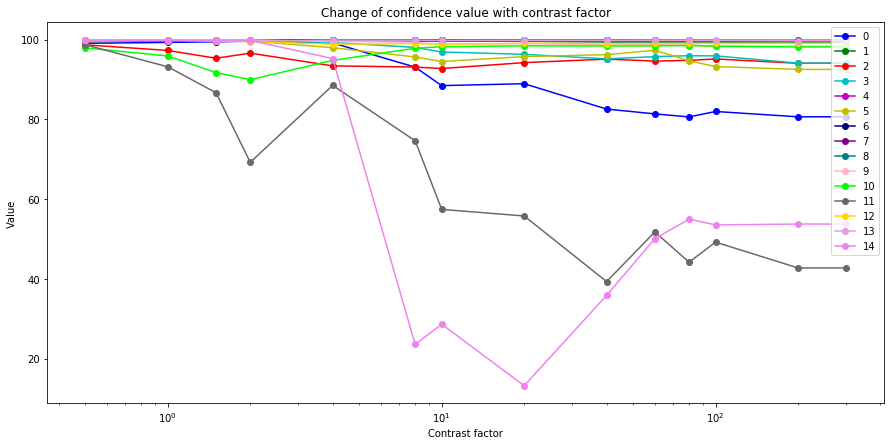

In [10]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
#color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
color=['b','g','r','c','m','y','navy','purple','teal','lightpink','lime','dimgray','gold','plum','violet','aqua']
i=-1
temp=0
val=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Contrast factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with contrast factor")
for d in listfc:
    
    if isinstance(d, Mapping):
        
        l1=[]
        l2=[]
        for x,y in d.items():
            l1.append(x)
            l2.append(y[1])

        i=i+1
        plt.plot(l1,l2,color =color[i],marker='o',label=i)
        
       
plt.legend(loc="upper right")   
plt.xscale("log")
plt.show()

In [11]:
from collections.abc import Mapping

name=""
for each in listmc:
    if isinstance(each, Mapping):
        flag=0
        for keyl,vall in each.items():
            if vall[0]=='1':
                vall[1]=100-vall[1]

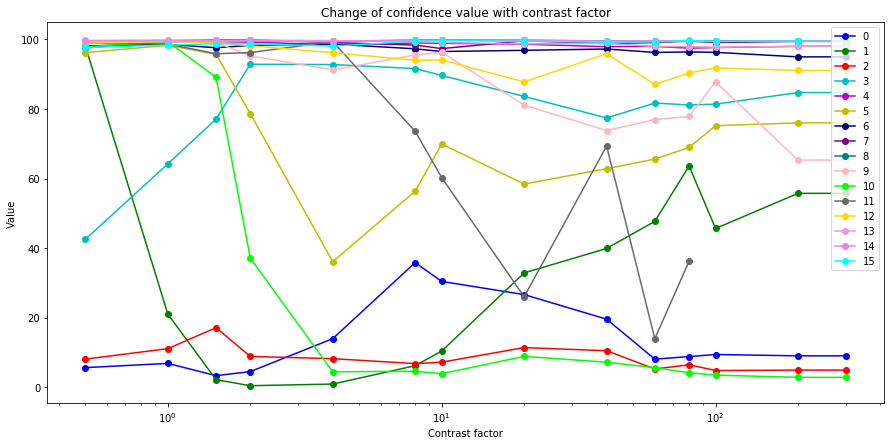

In [13]:
color=['b','g','r','c','m','y','navy','purple','teal','lightpink','lime','dimgray','gold','plum','violet','aqua']
i=-1
temp=0
val=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Contrast factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with contrast factor")
for d in listmc:
    
    if isinstance(d, Mapping):
        
        l1=[]
        l2=[]
        for x,y in d.items():
            l1.append(x)
            l2.append(y[1])

        i=i+1
        plt.plot(l1,l2,color =color[i],marker='o',label=i)
        
       
plt.legend(loc="upper right")   
plt.xscale("log")
plt.show()

In [243]:
for sharp in listof3:
    print(sharp)

adience1.jpg
{0.5: ['1', 93.83660888671875, '1', 94.59608459472656], 1.0: ['1', 93.18871307373047, '1', 95.48723602294922], 1.5: ['1', 97.46705627441406], 2.0: ['1', 95.54528045654297], 4.0: ['1', 86.07300567626953], 8.0: ['1', 64.19695281982422], 10: ['1', 69.60930633544922], 20: ['1', 73.39228057861328], 40: ['1', 80.45819091796875], 60: ['1', 91.96125030517578], 80: ['1', 91.22441101074219], 100: ['1', 90.62784576416016], 200: ['1', 91.00985717773438], 300: ['1', 91.00985717773438], 400: ['1', 91.00985717773438]}
blake.jpg
{0.5: ['0', 99.92969512939453], 1.0: ['0', 99.97807312011719], 1.5: ['0', 99.98133850097656], 2.0: ['0', 99.98246765136719], 4.0: ['0', 99.88717651367188], 8.0: ['0', 99.78453063964844], 10: ['0', 99.71287536621094], 20: ['0', 99.63395690917969], 40: ['0', 99.37555694580078], 60: ['0', 99.30061340332031], 80: ['0', 99.23219299316406], 100: ['0', 99.25912475585938], 200: ['0', 99.2129898071289], 300: ['0', 99.2129898071289], 400: ['0', 99.2129898071289]}
boy1.jpg
{

In [246]:
cat1shdict={}
listsh1=[]
ll1=[]
for cat2 in categorysh1:
    if isinstance(cat2, Mapping):
        cat1shdict={}
        for keycat2,valcat2 in cat2.items():
            for vals in valcat2:
                if vals=='0':
                    ll1.append(vals)
                if vals=='1':
                    ll1.append(vals)
                else:
                    cat1shdict[keycat2]=vals
        listsh1.append(cat1shdict)
print(listsh1)

[{0.5: 99.92969512939453, 1.0: 99.97807312011719, 1.5: 99.98133850097656, 2.0: 99.98246765136719, 4.0: 99.88717651367188, 8.0: 99.78453063964844, 10: 99.71287536621094, 20: 99.63395690917969, 40: 99.37555694580078, 60: 99.30061340332031, 80: 99.23219299316406, 100: 99.25912475585938, 200: 99.2129898071289, 300: 99.2129898071289, 400: 99.2129898071289}, {0.5: 99.9857406616211, 1.0: 99.98619842529297, 1.5: 99.971923828125, 2.0: 99.94415283203125, 4.0: 99.84486389160156, 8.0: 99.52033996582031, 10: 99.74181365966797, 20: 99.82440948486328, 40: 99.766357421875, 60: 99.75098419189453, 80: 99.77255249023438, 100: 99.88418579101562, 200: 99.80696105957031, 300: 99.80696105957031, 400: 99.80696105957031}, {0.5: 98.24629211425781, 1.0: 97.33777618408203, 1.5: 96.21947479248047, 2.0: 97.1795425415039, 4.0: 99.68940734863281, 8.0: 99.88501739501953, 10: 99.89069366455078, 20: 99.94075012207031, 40: 99.95726013183594, 60: 99.96178436279297, 80: 99.9652099609375, 100: 99.96674346923828, 200: 99.973

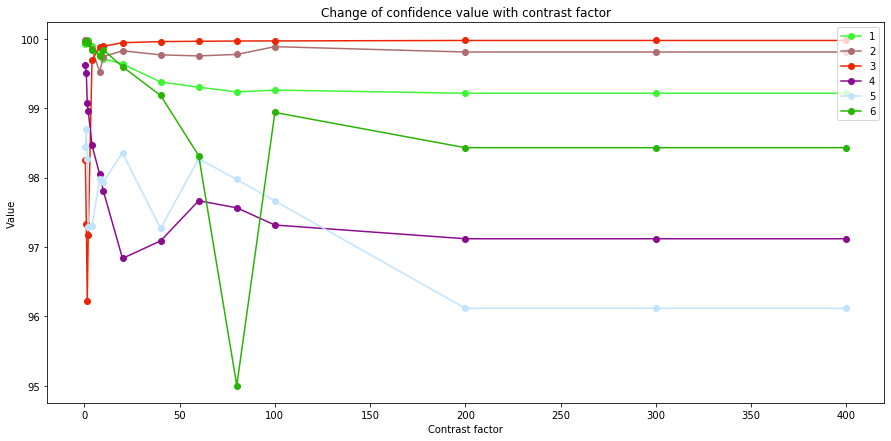

In [247]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
i=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Contrast factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with contrast factor")
for d in listsh1:
    i=i+1
    l1=[]
    l2=[]
    for x,y in d.items():
        l1.append(x)
        l2.append(y)
    plt.plot(l1, l2, color =color[i],marker='o',label=i)
plt.legend(loc="upper right")       
plt.show()